# Kmeans algorithm 

## What is the Kmeans algorithm ?
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

## How does spectral clustering work?
 In spectral clustering, the data points are treated as nodes of a graph. Thus, clustering is treated as a graph partitioning problem. The nodes are then mapped to a low-dimensional space that can be easily segregated to form clusters.


## What is the advantage of spectral clustering?
One remarkable advantage of spectral clustering is its ability to cluster “points” which are not necessarily vectors, and to use for this a“similarity”, which is less restric- tive than a distance

So the spectral clustering is the good algorithm when using dataset that is not flat

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn import cluster, datasets
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

## Create the moons dataset

kmeans_model  fowlkes_mallows_score =  0.49936452299132694
-----------------------------------------------------------------
Kernel_model  fowlkes_mallows_score =  1.0
-----------------------------------------------------------------
kmeans_model  fowlkes_mallows_score =  0.7428216496839728
-----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Kernel_model  fowlkes_mallows_score =  1.0
-----------------------------------------------------------------
kmeans_model  fowlkes_mallows_score =  0.9841070355136174
-----------------------------------------------------------------
Kernel_model  fowlkes_mallows_score =  0.9841070355136174
-----------------------------------------------------------------


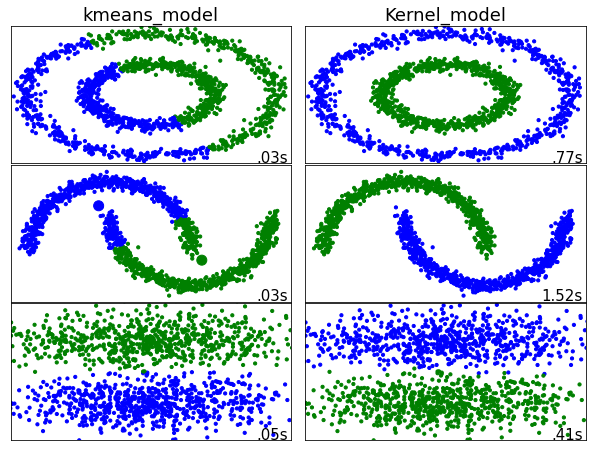

In [ ]:
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, centers =2,cluster_std=2,random_state=8)

colors = np.array(['blue','green','yellow','purple'])
colors = np.hstack([colors] * 20)

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
for i_dataset, dataset in enumerate([noisy_circles, noisy_moons, blobs]):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Compute distances
    #distances = np.exp(-euclidean_distances(X))
    distances = euclidean_distances(X)

    # create clustering estimators
    kmeans_model = KMeans(n_clusters=2, random_state=1)
    Kernel_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
    
    for name, algorithm in [
                            ('kmeans_model', kmeans_model),
                            ('Kernel_model', Kernel_model)
                           ]:
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        print(name," fowlkes_mallows_score = ", metrics.fowlkes_mallows_score(y, y_pred)) # TP / sqrt((TP + FP) * (TP + FN))
        # Measure the similarity of two clusterings of a set of points
        print('-----------------------------------------------------------------')
        # plot
        plt.subplot(4, 2, plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()